In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv('/content/diabetes.csv')

In [36]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
!pip install pandas numpy matplotlib

A.) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


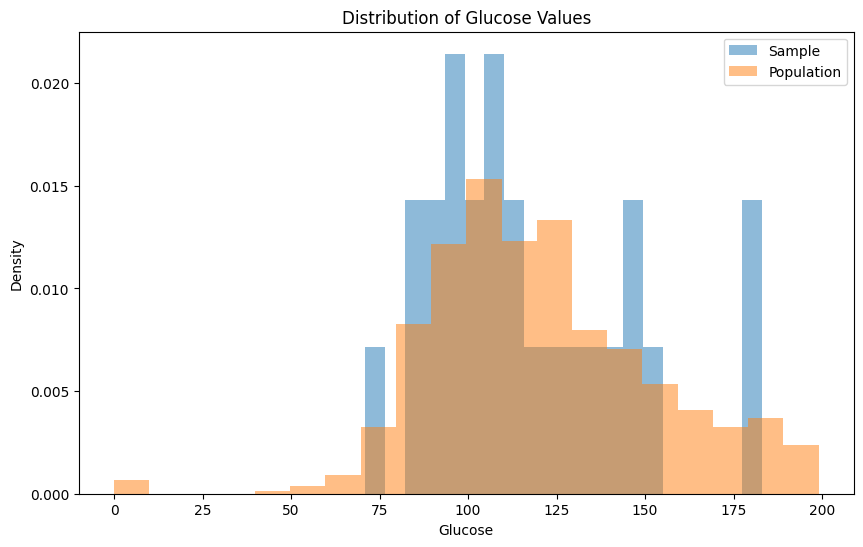

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

# Take random sample of 25 observations
sample = data.sample(n=25, random_state=42)

# Calculate sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Calculate population statistics
pop_mean_glucose = data['Glucose'].mean()
pop_max_glucose = data['Glucose'].max()

print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Max Glucose:", sample_max_glucose)
print("Population Mean Glucose:", pop_mean_glucose)
print("Population Max Glucose:", pop_max_glucose)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.hist(sample['Glucose'], alpha=0.5, bins=20, density=True, label='Sample')
plt.hist(data['Glucose'], alpha=0.5, bins=20, density=True, label='Population')
plt.legend()
plt.title('Distribution of Glucose Values')
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.show()

B.) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.


Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


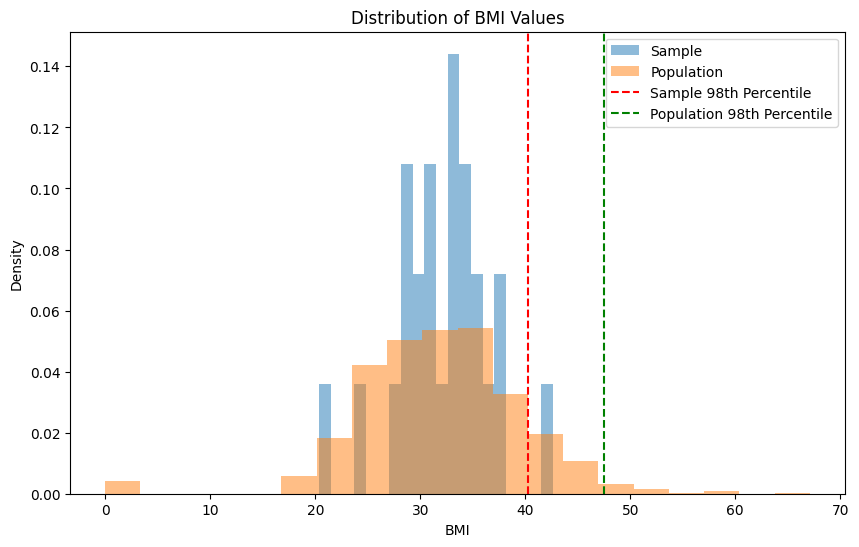

In [39]:
sample_bmi_98th = sample['BMI'].quantile(0.98)
pop_bmi_98th = data['BMI'].quantile(0.98)

print("Sample 98th Percentile BMI:", sample_bmi_98th)
print("Population 98th Percentile BMI:", pop_bmi_98th)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.hist(sample['BMI'], alpha=0.5, bins=20, density=True, label='Sample')
plt.hist(data['BMI'], alpha=0.5, bins=20, density=True, label='Population')
plt.axvline(sample_bmi_98th, color='r', linestyle='--', label='Sample 98th Percentile')
plt.axvline(pop_bmi_98th, color='g', linestyle='--', label='Population 98th Percentile')
plt.legend()
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

Bootstrap Average Mean BloodPressure: 69.17692000000001
Population Mean BloodPressure: 69.10546875

Bootstrap Average Standard Deviation BloodPressure: 19.073717755676082
Population Standard Deviation BloodPressure: 19.355807170644777

Bootstrap Average 75th Percentile BloodPressure: 79.5865
Population 75th Percentile BloodPressure: 80.0


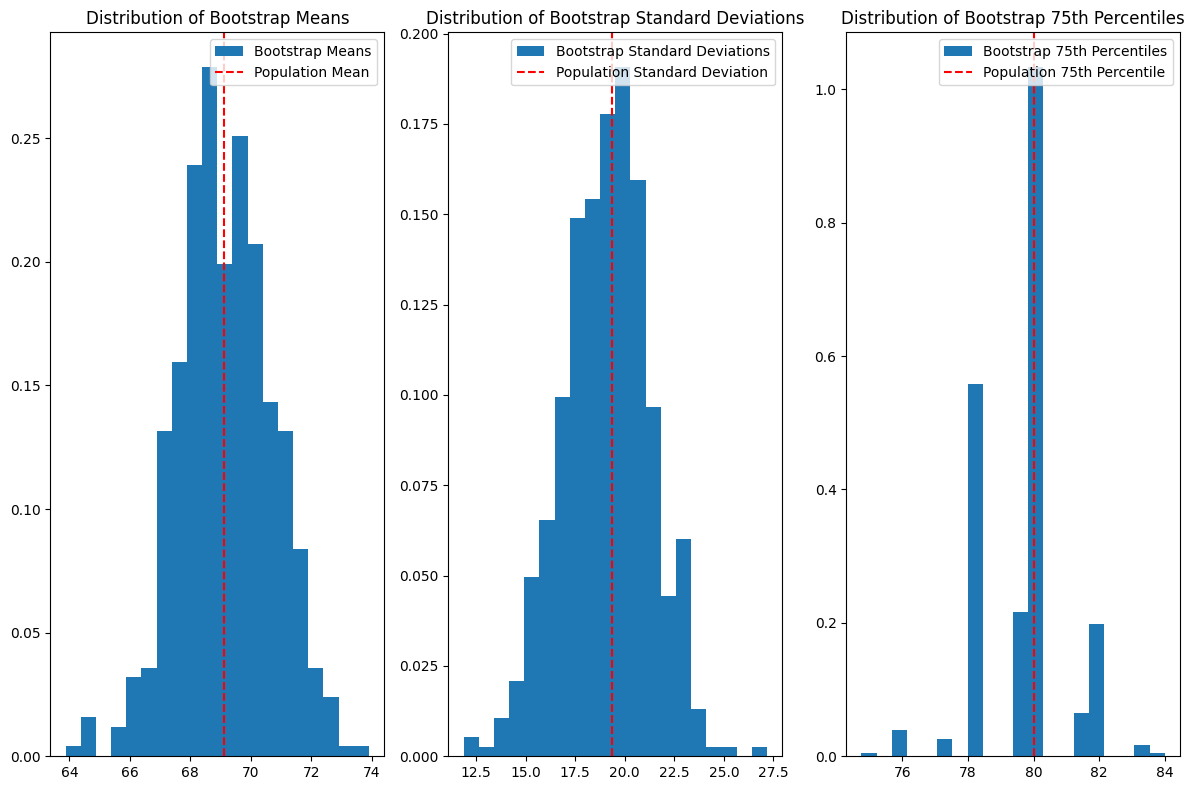

In [40]:
# Create 500 bootstrap samples of size 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = data['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 75))

# Calculate population statistics
pop_mean = data['BloodPressure'].mean()
pop_std = data['BloodPressure'].std()
pop_percentile = np.percentile(data['BloodPressure'], 75)

# Print statistics
print("Bootstrap Average Mean BloodPressure:", np.mean(bootstrap_means))
print("Population Mean BloodPressure:", pop_mean)
print("\nBootstrap Average Standard Deviation BloodPressure:", np.mean(bootstrap_stds))
print("Population Standard Deviation BloodPressure:", pop_std)
print("\nBootstrap Average 75th Percentile BloodPressure:", np.mean(bootstrap_percentiles))
print("Population 75th Percentile BloodPressure:", pop_percentile)

# Plot distributions
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=20, density=True, label='Bootstrap Means')
plt.axvline(pop_mean, color='r', linestyle='--', label='Population Mean')
plt.title('Distribution of Bootstrap Means')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=20, density=True, label='Bootstrap Standard Deviations')
plt.axvline(pop_std, color='r', linestyle='--', label='Population Standard Deviation')
plt.title('Distribution of Bootstrap Standard Deviations')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=20, density=True, label='Bootstrap 75th Percentiles')
plt.axvline(pop_percentile, color='r', linestyle='--', label='Population 75th Percentile')
plt.title('Distribution of Bootstrap 75th Percentiles')
plt.legend()

plt.tight_layout()
plt.show()